In [37]:
import numpy as np
import pandas as pd
import scipy

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Methods implementation

### Loss & cost functions

In [38]:
def mean_squared_error(y, y_pred):
    """
    Returns a mean squared error between real and predicted labels
    """
    y = np.array(y)
    y_pred = np.array(y_pred)
    mse = np.sum((y - y_pred)**2) / y.size
    return mse

def mean_absolute_error(y, y_pred):
    """
    Returns a mean absolute error between real and predicted labels
    """
    y = np.array(y)
    y_pred = np.array(y_pred)
    mae = np.sum(abs(y - y_pred)) / y.size
    return mae

def cost_function(w, X, y, type_f = 'mse'):
    """
    Returns a cost function of a linear model with coefficients w
    oh features X and labels y.
    """
    if (type_f == 'mae'):
        return mean_absolute_error(y, linear_prediction(w, X))
    elif (type_f == 'mse'):
        return mean_squared_error(y, linear_prediction(w, X))
    else:
        #raise
        print('error: incorrect type of function')
        return

### Linear regression model

In [39]:
def linear_regression_fit(X, y, minimize = 'analytical', cost_f = 'mse',
                          w0=None, eta=1e-2,):
    """
    Returns weights that minimizes cost function.
    """   
    if (minimize == 'analytical'):
        # the cost function is 'mse' automatically
        # X_t = X.transpose()
        # w = np.linalg.inv(X_t.dot(X)).dot(X_t).dot(y)
        n = X.shape[0]
        X = np.hstack((np.ones((n,1)),X))
        w = np.linalg.lstsq(X,y)[0]
        
    elif (minimize == 'grad_desc'):
        # the cost function is 'mse' automatically
        if(w0 == None):
            w0 = np.zeros(X.shape[1] + 1)
        n = X.shape[0]
        X = np.hstack((np.ones((n,1)),X))
        w = gradient_descent(X, y, w0, eta)[0]
        w = w.reshape(w.shape[0])

    elif (minimize == 'st_grad_desc'):
        # the cost function is 'mse' automatically
        if(w0 == None):
            w0 = np.zeros(X.shape[1] + 1)
        n = X.shape[0]
        X = np.hstack((np.ones((n,1)),X))
        w = stochastic_gradient_descent(X, y, w0, eta)[0]
        w = w.reshape(w.shape[0])
    
    elif (minimize == 'scipy_minimize'):
        if(w0 == None):
            w0 = np.zeros(X.shape[1] + 1)
        w = scipy.optimize.minimize(lambda w: cost_function(w, X, y, cost_f), w0).x
    else:
        #raise
        print('error: incorrect minimization method')
        return
    return w
    

def linear_prediction(w, X):
    """
    Returns a linear regression model prediction labels for objects in matrix 
    X using weights w:
    y_pred = (X,w)
    """
    if X.ndim == 1:
        return(np.insert(X, 0, 1).dot(w))
    else:
        n = X.shape[0]
        return np.dot(np.hstack((np.ones((n,1)),X)),w)

### Gradient descent

In [40]:
def gradient_step(X, y, w, eta=0.01):
    n = len(w)
    grad = 2 * X.T.dot(X.dot(w) - y) / X.shape[0] 
    w_next = w - eta * grad 
    return w_next

def gradient_descent(X, y, w0=None, eta=1e-2, max_iter=1e4,
                     min_weight_dist=1e-8, seed=42, verbose=False):    
    X = np.array(X)
    y = np.array(y)
    if(w0 == None):
        w0 = np.zeros(X.shape[1])
        
    w = w0
    weight_dist = np.inf
    errors = []
    iter_num = 0
        
    while weight_dist > min_weight_dist and iter_num < max_iter:  
        random_ind = np.random.randint(X.shape[0])
        w_next = gradient_step(X, y, w, eta)        
        errors.append(mean_squared_error(y, np.dot(X, w_next)))
        weight_dist = np.linalg.norm(w_next - w)      
        w = w_next
        iter_num += 1
    return w, errors

### Stochastic gradient descent

In [41]:
def stochastic_gradient_step(X, y, w, k, eta=0.01):
    n = len(w)
    grad = 2 * (X[k].dot(w) - y[k]) * X[k,:] / X.shape[0] 
    w_next = w - eta * grad   
    return w_next

def stochastic_gradient_descent(X, y, w_init=None, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):    
    X = np.array(X)
    y = np.array(y)
    if(w_init == None):
        w_init = np.zeros(X.shape[1])
        
    w = w_init
    weight_dist = np.inf
    errors = []
    iter_num = 0
    #import random
    #k = np.array(range(X.shape[0]))
    #random.shuffle(k)
    np.random.seed(seed)
        
    while weight_dist > min_weight_dist and iter_num < max_iter:  
        #print('\nit.',iter_num)
        #print('X: ',X[:5])
        #print('y: ',y[:5])
        #print('w: ',w)
        random_ind = np.random.randint(X.shape[0])
        #print('k: ',random_ind)
        w_next = stochastic_gradient_step(X, y, w, random_ind, eta)        
        #print('w1 ',w_next)
        errors.append(mean_squared_error(y, np.dot(X, w_next)))
        weight_dist = np.linalg.norm(w_next - w)      
        #print('d: ',weight_dist)
        w = w_next
        iter_num += 1
        #if(iter_num == 5):
            #break
    return w, errors

# Data

### Generate / Import dataset

In [42]:
def normalize(X, mean_std = True):
    if mean_std:
        means, stds = X.mean(axis=0), X.std(axis=0)
        X = (X - means) / stds
    else:
        minim, maxim = data.min(axis = 0), data.max(axis = 0)
        X = (X - minim) / (maxim - minim)
    return X

In [43]:
from sklearn import datasets 

sample_size = 200
data, target = datasets.make_regression(n_samples = sample_size,
                                        n_features = 1, 
                                        n_informative = 1, 
                                        n_targets = 1, noise = 5.,
                                        coef = False, random_state = 2)
#data = normalize(data)

In [44]:
#data = pd.read_csv('Data/weights_heights.csv', index_col='Index')
data_frame = pd.read_csv('Data/advertising.csv')

features = ['TV'] # , 'Radio','Newspaper']
labels = ['Sales']
data = np.array(data_frame[features].values, dtype=float)[:sample_size]
target = np.array(data_frame[labels].values, dtype=float)[:sample_size]
target = target.reshape(target.shape[0])

data = normalize(data)

### Split dataset into train & test samples

In [45]:
from sklearn import cross_validation
train_data, test_data, train_labels, test_labels = \
cross_validation.train_test_split(data, target, test_size = 0.3)

In [55]:
print('train_data: \n',train_data[:5],'\n...\n')
print('train_labels: \n',train_labels[:5],'...')

train_data: 
 [[ 0.61604287]
 [ 1.05509347]
 [ 0.79820216]
 [-1.09228433]
 [-1.42507534]] 
...

train_labels: 
 [ 11.4  12.5  17.1   8.1   7.2] ...


# Run models and output

### Auxiliary functions

In [47]:
def print_result(coef, true, predict, cut = 5):
    print('w:\n',coef,'\n')
    print('true vs. prediction:\n',vstack((true,predict)).T[:cut],'\n...')

In [48]:
def plot_for_one_feature(train_data, train_labels, w, title):
    x = np.linspace(train_data.min(), train_data.max(), 2).reshape((2,1))
    plt.figure(figsize = (8,5))
    plt.plot(train_data, train_labels, 'o', markersize = 3)
    #print(x)
    #print(linear_prediction(w, x))
    plt.plot(x, linear_prediction(w,x), '-', linewidth = 4)
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.title(title)
    plt.show()

### Analytical OLS method

w:
 [ 14.15820514   4.21477685] 

true vs. prediction:
 [[ 14.6         14.17087812]
 [ 17.1         15.6325765 ]
 [ 15.7         18.69869802]
 [  8.7         11.37051994]
 [ 12.6         10.6175238 ]] 
...


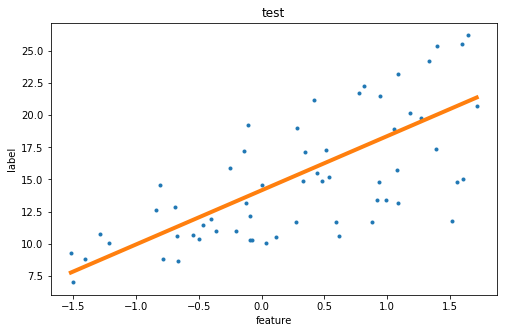

In [49]:
w = linear_regression_fit(train_data, train_labels, minimize='analytical')
print_result(w,test_labels,linear_prediction(w, test_data))
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')

### Numerical method using gradient descent

/Users/Yaroslava/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  # This is added back by InteractiveShellApp.init_path()


w:
 [ 14.15820511   4.21477683] 

true vs. prediction:
 [[ 14.6         14.17087808]
 [ 17.1         15.63257646]
 [ 15.7         18.69869796]
 [  8.7         11.37051992]
 [ 12.6         10.61752379]] 
...


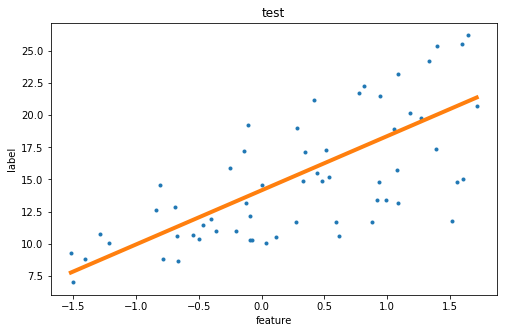

In [50]:
w0 = np.array([1,0])
w = linear_regression_fit(train_data, train_labels,
                          minimize='grad_desc', eta=0.1)

print_result(w,test_labels,linear_prediction(w, test_data))
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')

### Numerical method using stochastic gradient descent

/Users/Yaroslava/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  # This is added back by InteractiveShellApp.init_path()


w:
 [ 14.26664038   4.40043628] 

true vs. prediction:
 [[ 14.6         14.2798716 ]
 [ 17.1         15.80595727]
 [ 15.7         19.00714036]
 [  8.7         11.35615864]
 [ 12.6         10.56999329]] 
...


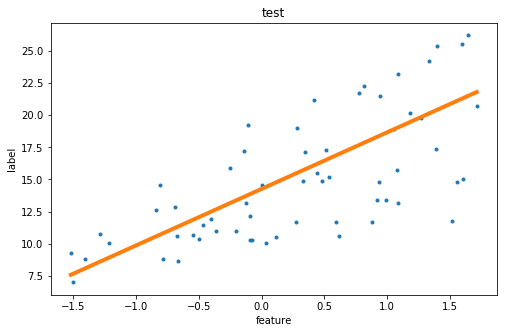

In [51]:
w0 = np.array([1,0])
w = linear_regression_fit(train_data, train_labels,
                          minimize='st_grad_desc', eta=0.1)

print_result(w,test_labels,linear_prediction(w, test_data))
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')

### Numerical method using scipy.optimize.minimize

w:
 [ 14.13565359   4.4825962 ] 

true vs. prediction:
 [[ 14.6         14.14913184]
 [ 17.1         15.70371085]
 [ 15.7         18.96466277]
 [  8.7         11.17083065]
 [ 12.6         10.36998692]] 
...


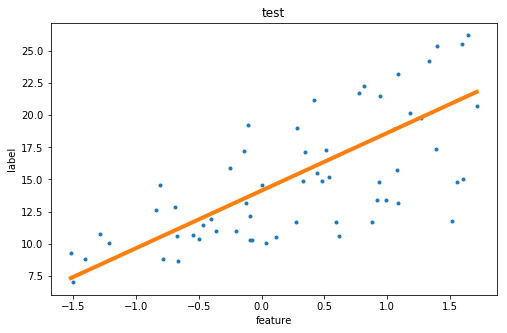

In [52]:
w0 = np.array([1,0])
w = linear_regression_fit(train_data, train_labels, minimize='scipy_minimize', cost_f='mae')

w.reshape((1,w.shape[0]))
print_result(w,test_labels,linear_prediction(w, test_data))
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')

### sklearn.linear_model.SGDRegression for check

w:
 [ 14.02453625   4.0569283 ] 

true vs. prediction:
 [[ 14.6         14.03673461]
 [ 17.1         15.44369059]
 [ 15.7         18.39498211]
 [  8.7         11.34125328]
 [ 12.6         10.61645777]] 
...


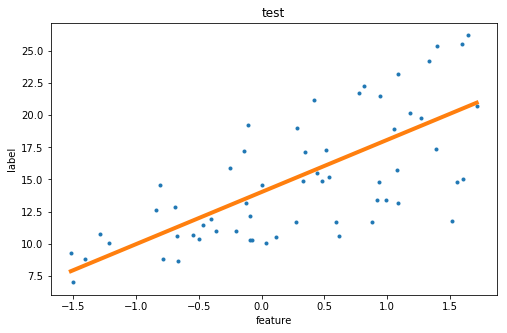

In [53]:
from sklearn import linear_model 

sgd_regressor = linear_model.SGDRegressor(random_state=1, n_iter=20)
sgd_regressor.fit(train_data, train_labels)
sgd_regressor.predict(test_data)
w = [linear_regressor.intercept_]
w.extend(linear_regressor.coef_)
w = np.array(w)
print_result(w,test_labels,linear_regressor.predict(test_data))
if train_data.shape[1] == 1:
    #plot_for_one_feature(train_data, train_labels, w, 'train')
    plot_for_one_feature(test_data, test_labels, w, 'test')